In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [40]:
df=pd.read_csv("D:\\Users\\hp\\Downloads\\food_truck_marketing_data.csv")

In [41]:
df.head(5)

,date,truck_location,marketing_channel,customers,avg_order_value,total_sales,repeat_customers,weather
0,2025-01-01,Downtown,Instagram,23,14.44,332.12,3,Sunny
1,2025-01-01,Downtown,Food Delivery Apps,3,17.07,51.21,1,Rainy
2,2025-01-01,Downtown,Local Events,17,11.11,188.87,3,Sunny
3,2025-01-01,Downtown,Google My Business,12,11.10,133.20,2,Sunny
4,2025-01-01,Downtown,Loyalty Program,30,9.78,293.40,8,Sunny


In [42]:
# description of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customers,3150.0,17.684444,8.628833,1.00,11.00,17.000,24.000,46.00
avg_order_value,3150.0,12.517010,2.979232,1.75,10.54,12.575,14.520,21.97
total_sales,3150.0,221.898394,124.807947,9.94,123.21,203.275,301.725,934.72
repeat_customers,3150.0,4.817460,3.480565,0.00,2.00,4.000,7.000,20.00


In [43]:
#know the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               3150 non-null   object 
 1   truck_location     3150 non-null   object 
 2   marketing_channel  3150 non-null   object 
 3   customers          3150 non-null   int64  
 4   avg_order_value    3150 non-null   float64
 5   total_sales        3150 non-null   float64
 6   repeat_customers   3150 non-null   int64  
 7   weather            3150 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 197.0+ KB


In [44]:
#look for null values, just to be sure
df.isna().sum()

date                 0
truck_location       0
marketing_channel    0
customers            0
avg_order_value      0
total_sales          0
repeat_customers     0
weather              0
dtype: int64

In [45]:
#duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3145    False
3146    False
3147    False
3148    False
3149    False
Length: 3150, dtype: bool

### BUSINESS QUESTION TO ANSWER:•	"Which truck location generates the most profitable customers?"


#### Which location attracts high-spending customers

In [46]:
#this shows the number of customers that spend more per order in each location
aov_per_location = df.groupby('truck_location')['avg_order_value'].mean().sort_values(ascending=False)
print(aov_per_location)

truck_location
Suburbia     12.653857
Uptown       12.570222
Downtown     12.527444
Riverside    12.511952
Midtown      12.321571
Name: avg_order_value, dtype: float64


#### Which location attracts loyal customers

In [47]:
df['repeat_ratio'] = df['repeat_customers'] / df['customers']
repeat_per_location=df.groupby('truck_location')['repeat_ratio'].mean().sort_values(ascending= False)
print(repeat_per_location)

truck_location
Midtown      0.267130
Suburbia     0.260017
Riverside    0.257917
Downtown     0.257825
Uptown       0.247752
Name: repeat_ratio, dtype: float64


###### higher repeat ratios = more customer loyalty = more profit over time

#### Which location gets the most money per customer?

In [48]:
df['sales_per_customer']=df['total_sales'] / df['customers']
sales_per_customer_per_location = df.groupby('truck_location')['sales_per_customer'].mean().sort_values(ascending = False)
print(sales_per_customer_per_location)

truck_location
Suburbia     12.653857
Uptown       12.570222
Downtown     12.527444
Riverside    12.511952
Midtown      12.321571
Name: sales_per_customer, dtype: float64


#### Which location generates the most revenue overall?

In [49]:
total_sales_per_location= df.groupby('truck_location')['total_sales'].sum().sort_values(ascending= False)
print(total_sales_per_location)


truck_location
Downtown     141376.83
Suburbia     141101.46
Riverside    140415.09
Midtown      138304.73
Uptown       137781.83
Name: total_sales, dtype: float64


In [50]:
df['profitability_score'] = (
    df['avg_order_value'] * 0.4 +
    df['sales_per_customer'] * 0.3 +
    df['repeat_ratio'] * 0.3
)


In [51]:
score_per_location = df.groupby('truck_location')['profitability_score'].mean().sort_values(ascending=False)
print(score_per_location)


truck_location
Suburbia     8.935705
Uptown       8.873481
Downtown     8.846559
Riverside    8.835742
Midtown      8.705239
Name: profitability_score, dtype: float64


### VISUALIZATION

#### AVERAGE ORDER VALUE PER LOCATION

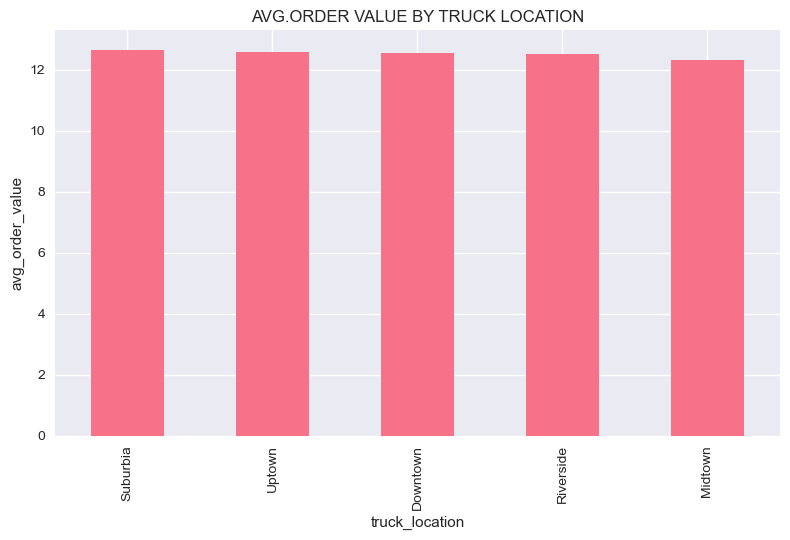

In [52]:
aov_per_location.plot(kind='bar', title="AVG.ORDER VALUE BY TRUCK LOCATION")
plt.ylabel('avg_order_value')
plt.xlabel('truck_location')
plt.tight_layout()
plt.show()

#### REPEAT_RATIO PER TRUCK LOCATION

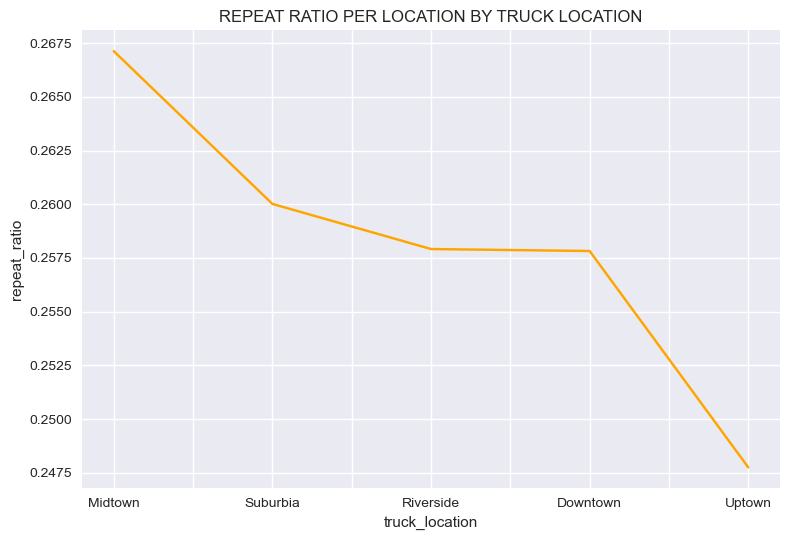

In [53]:
repeat_per_location.plot(kind='line', title ='REPEAT RATIO PER LOCATION BY TRUCK LOCATION',color='orange')
plt.ylabel('repeat_ratio')
plt.xlabel('truck_location')
plt.tight_layout()
plt.show()

#### SALES PER CUSTOMER PER LOCATION

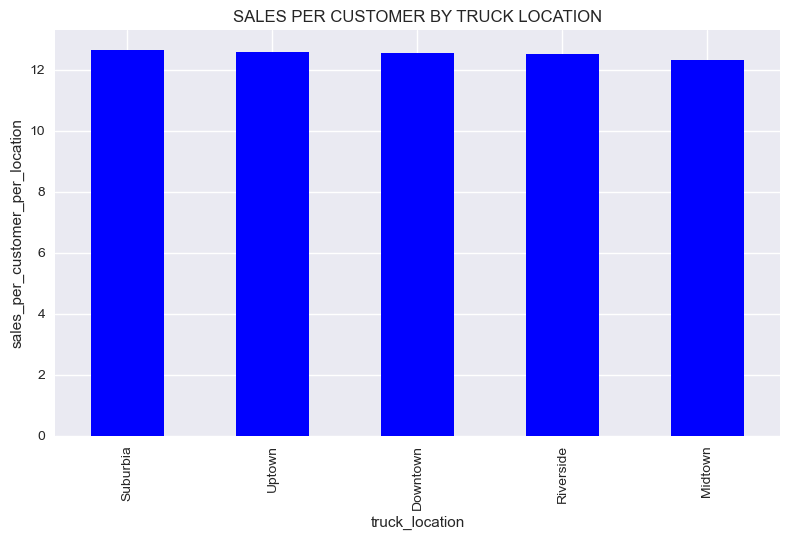

In [54]:
sales_per_customer_per_location.plot(kind='bar', title='SALES PER CUSTOMER BY TRUCK LOCATION', color='blue')
plt.xlabel('truck_location')
plt.ylabel('sales_per_customer_per_location')
plt.tight_layout()
plt.show()

#### TOTAL SALES PER TRUCK LOCATION

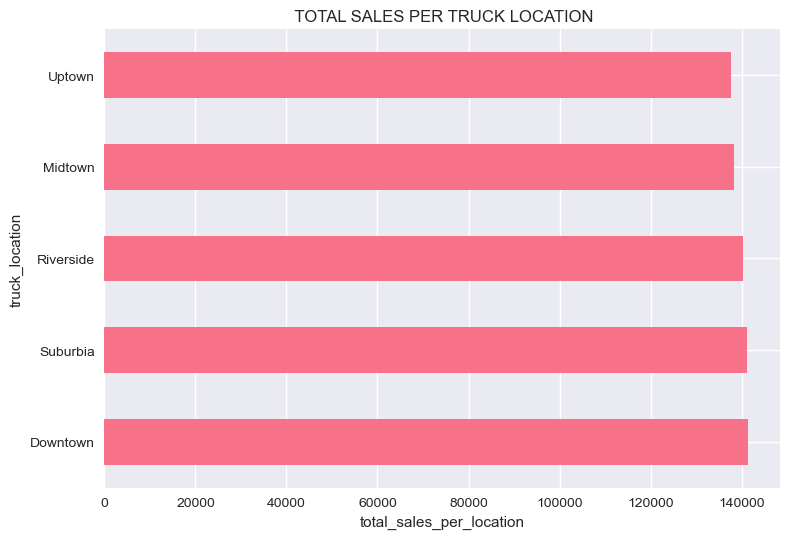

In [55]:
total_sales_per_location.plot(kind='barh', title=' TOTAL SALES PER TRUCK LOCATION')
plt.ylabel('truck_location')
plt.xlabel('total_sales_per_location')
plt.tight_layout()
plt.show()